In [4]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
pca.components_.shape

(50, 10000)

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

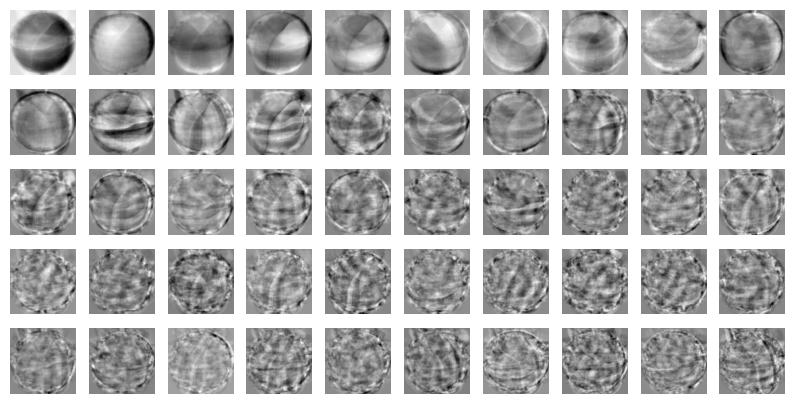

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


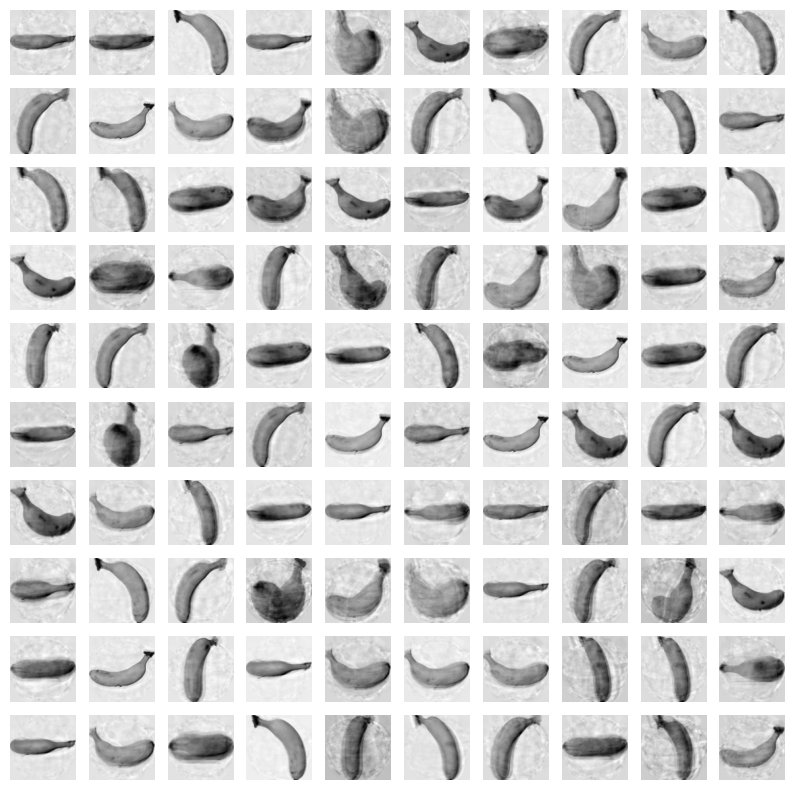

In [16]:
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[200:300])

In [18]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9215611404696512)

In [19]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486383, 0.00480347,
       0.00447834, 0.00437315, 0.0040804 , 0.00389475, 0.00372439,
       0.00359238, 0.00331461, 0.00317837, 0.00304319, 0.00303745,
       0.00288814, 0.00275862, 0.00264954, 0.00255929, 0.00252184,
       0.0024721 , 0.00239326, 0.00230696, 0.00222032, 0.00216481,
       0.00213797, 0.00196486, 0.00191579, 0.00191255, 0.00184722,
       0.00182488, 0.00172339, 0.00169013, 0.00163777, 0.0015944 ])

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]* 100 + [1] * 100 + [2] * 100)

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.16705918, 0.13953757, 0.12933016, 0.13696527, 0.13792634]), 'score_time': array([0.00197577, 0.00197482, 0.00178027, 0.00191379, 0.00181246]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.0077951 , 0.01105452, 0.0090158 , 0.0095849 , 0.01278996]), 'score_time': array([0.00084448, 0.00077772, 0.00081229, 0.00062037, 0.00050831]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [24]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

In [26]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [27]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\1-20\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-20\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.04455042, 0.01713395, 0.01766062, 0.0105691 , 0.02109122]),
 'score_time': array([0.00093985, 0.00050163, 0.00050092, 0.00048971, 0.00047731]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [28]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [31]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

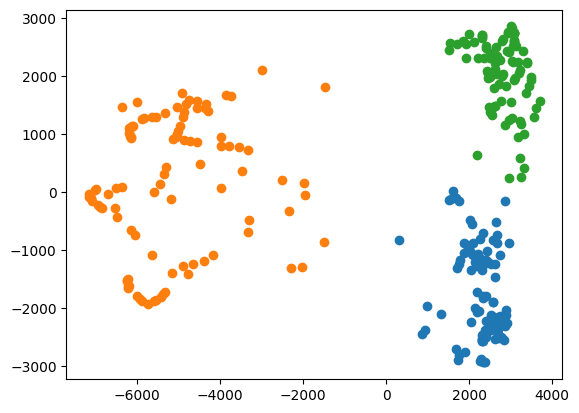

In [33]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:, 1])

캐글 titanic leaderboard 학습을 통해 예측 하는 모델 만들기. 1장~5장 통해서 만들어 보기